# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
#--------------------------------------------------
# DEPENDANCIES
#--------------------------------------------------
import os
import json
import requests
import pandas as pd
from api_keys import weather_api_key
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [29]:
#--------------------------------------------------
# IMPRORT WORLD CITIES CSV
#--------------------------------------------------
city_data_path = "worldcities.csv"
city_data = pd.read_csv(city_data_path)
city_data.head()

#--------------------------------------------------
# GENERATE RANDOM LIST OF 500 CITIES
#--------------------------------------------------
cities = random.sample(list(city_data["City"]),650)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
#--------------------------------------------------
# CREATE REQUIRED EMPTY LISTS
#--------------------------------------------------
city_list = []
lat_list = []
long_list = []
temparature_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

city_number = 0

units = "metric"

# Loop through each character
for city in cities:
    city_number += 1
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city

    # Create search query, make request and store in json
    response = requests.get(query_url)
    response_json = response.json()
    
    print(f'City number {city_number} is {city}.')
    # print(f'{query_url}')
    # print(response_json)    

    #--------------------------------------------------
    # APPEND VALUES TO LISTS
    #--------------------------------------------------
    try:
        city_list.append(response_json["name"])
        lat_list.append(response_json["coord"]["lat"])
        long_list.append(response_json["coord"]["lon"])
        temparature_list.append(response_json["main"]["temp_max"])
        humidity_list.append(response_json["main"]["humidity"])
        cloudiness_list.append(response_json["clouds"]["all"])
        wind_speed_list.append(response_json["wind"]["speed"])
    except:
        KeyError


City number 1 is geraldton.
City number 2 is pinar del rio.
City number 3 is corte madera.
City number 4 is skeldon.
City number 5 is omutinskoye.
City number 6 is huitan.
City number 7 is akoupe.
City number 8 is kez.
City number 9 is guimaraes.
City number 10 is subottsi.
City number 11 is nyzy.
City number 12 is cosmesti.
City number 13 is entre rios.
City number 14 is yeovil.
City number 15 is kalol.
City number 16 is bettange-sur-mess.
City number 17 is krasnozavodsk.
City number 18 is inyonga.
City number 19 is sesquile.
City number 20 is bosarkany.
City number 21 is puurs.
City number 22 is dawukou.
City number 23 is pak chong.
City number 24 is aninoasa.
City number 25 is darien.
City number 26 is bahna.
City number 27 is loudeac.
City number 28 is chipata.
City number 29 is dulce nombre de culmi.
City number 30 is szekszard.
City number 31 is qufu.
City number 32 is dumalinao.
City number 33 is carlentini.
City number 34 is hayden.
City number 35 is necaxa.
City number 36 is s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
# Create output df with required results
output_df = pd.DataFrame(
    {"City": city_list,
     "Latitude": lat_list,
     "Longitude": long_list,
     "Temperature": temparature_list,
     "Humidity": humidity_list,
     "Cloudiness": cloudiness_list,    
     "Wind_Speed": wind_speed_list,    
    }
)

output_df.to_csv('cities_df.csv')
output_df


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,Geraldton,-28.7667,114.6000,31.23,22,7,2.57
1,Pinar del Río,22.4175,-83.6981,19.58,83,26,3.14
2,Corte Madera,37.9255,-122.5275,15.74,74,0,4.02
3,Skeldon,5.8833,-57.1333,23.64,95,99,1.49
4,Huitán,15.1000,-91.6167,11.87,86,93,0.77
...,...,...,...,...,...,...,...
614,Bogorodskoye,56.5500,37.8833,9.12,77,100,3.15
615,Dippach,50.9196,10.0424,8.89,70,95,4.56
616,Johannesburg,-26.2023,28.0436,13.42,94,56,1.79
617,West Valley City,40.6916,-112.0011,8.13,59,75,4.02


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

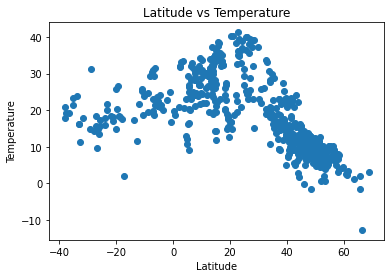

In [32]:
# Set x_values and y_values
x_values = lat_list
y_values = temparature_list

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature")

# Save to Images folder
plt.savefig("Images/Latitude_vs_Temperature.png");

#---------------------------------------------------------------------
# NEED TO ADD A SENTENCE OR TWO EXPLAINING WHAT THE CODE IS ANALYSING
#---------------------------------------------------------------------

## Latitude vs. Humidity Plot

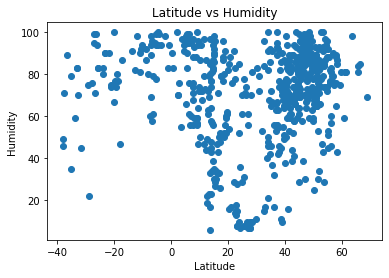

In [33]:
# Set x_values and y_values
x_values = lat_list
y_values = humidity_list

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

# Save to Images folder
plt.savefig("Images/Latitude_vs_Humidity.png");

#---------------------------------------------------------------------
# NEED TO ADD A SENTENCE OR TWO EXPLAINING WHAT THE CODE IS ANALYSING
#---------------------------------------------------------------------

## Latitude vs. Cloudiness Plot

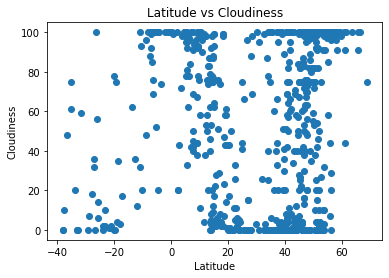

In [34]:
# Set x_values and y_values
x_values = lat_list
y_values = cloudiness_list

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

# Save to Images folder
plt.savefig("Images/Latitude_vs_Cloudiness.png");

#---------------------------------------------------------------------
# NEED TO ADD A SENTENCE OR TWO EXPLAINING WHAT THE CODE IS ANALYSING
#---------------------------------------------------------------------

## Latitude vs. Wind Speed Plot

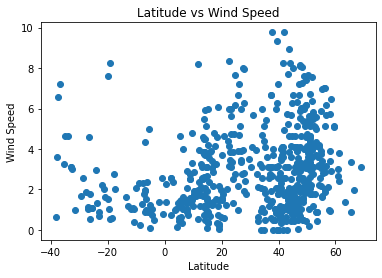

In [35]:
# Set x_values and y_values
x_values = lat_list
y_values = wind_speed_list

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

# Save to Images folder
plt.savefig("Images/Latitude_vs_Wind Speed.png");

#---------------------------------------------------------------------
# NEED TO ADD A SENTENCE OR TWO EXPLAINING WHAT THE CODE IS ANALYSING
#---------------------------------------------------------------------


## Linear Regression

In [36]:
north_hem_df = output_df.loc[output_df['Latitude'] >= 0]
south_hem_df = output_df.loc[output_df['Latitude'] < 0]

north_lat = north_hem_df["Latitude"]
north_long = north_hem_df["Longitude"]
north_temp = north_hem_df["Temperature"]
north_humidity = north_hem_df["Humidity"]
north_cloud = north_hem_df["Cloudiness"]
north_wind = north_hem_df["Wind_Speed"]

south_lat = south_hem_df["Latitude"]
south_long = south_hem_df["Longitude"]
south_temp = south_hem_df["Temperature"]
south_humidity = south_hem_df["Humidity"]
south_cloud = south_hem_df["Cloudiness"]
south_wind = south_hem_df["Wind_Speed"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The line_eq is: y = -0.49x + 34.57


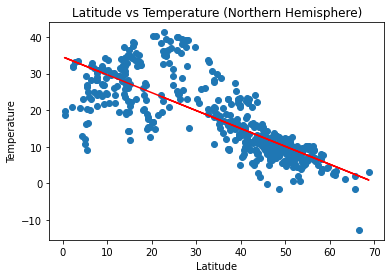

In [37]:
# Set x_values and y_values
x_values = north_lat
y_values = north_temp

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,270),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature (Northern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Temperature (Northern Hemisphere).png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The line_eq is: y = 0.18x + 23.27


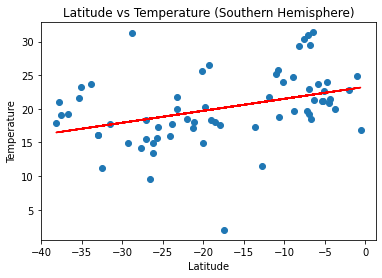

In [38]:
# Set x_values and y_values
x_values = south_lat
y_values = south_temp

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,302),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature (Southern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Temperature (Southern Hemisphere).png")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line_eq is: y = 0.31x + 58.83


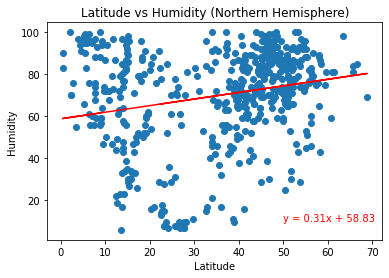

In [39]:
# Set x_values and y_values
x_values = north_lat
y_values = north_humidity

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity (Northern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Humidity (Northern Hemisphere).png")



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line_eq is: y = 0.68x + 92.67


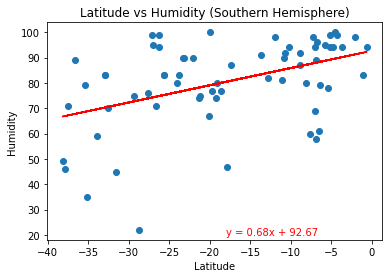

In [40]:
# Set x_values and y_values
x_values = south_lat
y_values = south_humidity

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18,20),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity (Southern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Humidity (Southern Hemisphere).png")



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line_eq is: y = 0.15x + 45.47


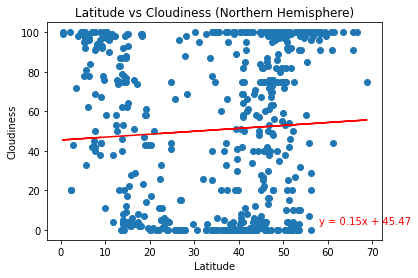

In [41]:
# Set x_values and y_values
x_values = north_lat
y_values = north_cloud

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(58,3),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (Northern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Cloudiness (Northern Hemisphere).png")



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line_eq is: y = 2.38x + 89.84


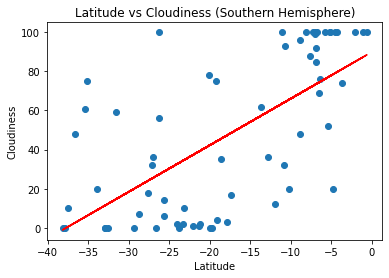

In [42]:
# Set x_values and y_values
x_values = south_lat
y_values = south_cloud

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,50),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (Southern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Cloudiness (Southern Hemisphere).png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line_eq is: y = 0.03x + 2.01


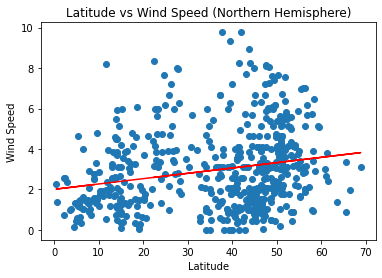

In [43]:
# Set x_values and y_values
x_values = north_lat
y_values = north_wind

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(58,11),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed (Northern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Wind Speed (Northern Hemisphere).png")




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line_eq is: y = -0.06x + 1.09


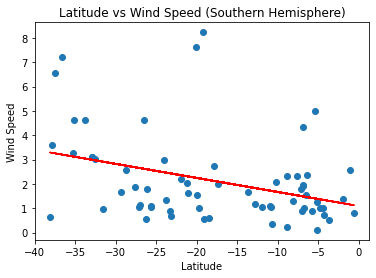

In [44]:
# Set x_values and y_values
x_values = south_lat
y_values = south_wind

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,9),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed (Southern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Wind Speed (Southern Hemisphere).png")

